In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from fancyimpute import IterativeImputer, KNN
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from pyculiarity import detect_ts
from scipy import stats

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Accidentes en Barranquilla
(Accidentes en Barranquilla)

In [ ]:
dfacci = pd.read_csv('/content/Accidentalidad_en_Barranquilla_20240826.csv')

In [ ]:
dfacci.head()
print(dfacci.columns)

Index(['FECHA_ACCIDENTE', 'HORA_ACCIDENTE', 'GRAVEDAD_ACCIDENTE',
       'CLASE_ACCIDENTE', 'SITIO_EXACTO_ACCIDENTE',
       'CANT_HERIDOS_EN _SITIO_ACCIDENTE', 'CANT_MUERTOS_EN _SITIO_ACCIDENTE',
       'CANTIDAD_ACCIDENTES', 'AÑO_ACCIDENTE', 'MES_ACCIDENTE',
       'DIA_ACCIDENTE'],
      dtype='object')


In [ ]:
print(dfacci.shape)
print(dfacci.info())

(25610, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25610 entries, 0 to 25609
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA_ACCIDENTE                   25610 non-null  object 
 1   HORA_ACCIDENTE                    25610 non-null  object 
 2   GRAVEDAD_ACCIDENTE                25610 non-null  object 
 3   CLASE_ACCIDENTE                   25610 non-null  object 
 4   SITIO_EXACTO_ACCIDENTE            25610 non-null  object 
 5   CANT_HERIDOS_EN _SITIO_ACCIDENTE  9984 non-null   float64
 6   CANT_MUERTOS_EN _SITIO_ACCIDENTE  252 non-null    float64
 7   CANTIDAD_ACCIDENTES               25610 non-null  int64  
 8   AÑO_ACCIDENTE                     25610 non-null  int64  
 9   MES_ACCIDENTE                     25610 non-null  object 
 10  DIA_ACCIDENTE                     25610 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 2.1+ M

In [ ]:
print(dfacci.describe(include='all'))

                FECHA_ACCIDENTE HORA_ACCIDENTE GRAVEDAD_ACCIDENTE  \
count                     25610          25610              25610   
unique                     2357            871                  3   
top     2018-06-08T00:00:00.000    03:00:00:pm         Solo daños   
freq                         34            408              15457   
mean                        NaN            NaN                NaN   
std                         NaN            NaN                NaN   
min                         NaN            NaN                NaN   
25%                         NaN            NaN                NaN   
50%                         NaN            NaN                NaN   
75%                         NaN            NaN                NaN   
max                         NaN            NaN                NaN   

       CLASE_ACCIDENTE SITIO_EXACTO_ACCIDENTE  \
count            25610                  25610   
unique               6                  15365   
top             Choque  

## Revisión de la Base de Datos

La base de datos contiene 25,610 observaciones y 11 variables. A continuación, se describen las variables:

-   **FECHA_ACCIDENTE (Categórica)**: Fecha en la que ocurrió el accidente.
-   **HORA_ACCIDENTE (Categórica)**: Hora exacta en la que ocurrió el accidente.
-   **GRAVEDAD_ACCIDENTE (Categórica)**: Nivel de gravedad del accidente.
-   **CLASE_ACCIDENTE (Categórica)**: Tipo o clase de accidente (ej. choque, atropello).
-   **SITIO_EXACTO_ACCIDENTE (Categórica)**: Lugar exacto donde ocurrió el accidente.
-   **CANT_HERIDOS_EN.\_SITIO_ACCIDENTE (Numérica)**: Cantidad de personas heridas en el sitio del accidente.
-   **CANT_MUERTOS_EN.\_SITIO_ACCIDENTE (Numérica)**: Cantidad de personas fallecidas en el sitio del accidente.
-   **CANTIDAD_ACCIDENTES (Numérica)**: Número de accidentes registrados en esa fecha.
-   **AÑO_ACCIDENTE (Numérica)**: Año en el que ocurrió el accidente.
-   **MES_ACCIDENTE (Categórica)**: Mes en el que ocurrió el accidente.
-   **DIA_ACCIDENTE (Categórica)**: Día del mes en que ocurrió el accidente.

Como observamos, vamos a realizar un análisis separando las variables categóricas y las numéricas.

## Analisis de las variables categoricas



In [ ]:
# Variables categóricas
print(dfacci['FECHA_ACCIDENTE'].describe())
print(dfacci['HORA_ACCIDENTE'].describe())
print(dfacci['GRAVEDAD_ACCIDENTE'].describe())
print(dfacci['CLASE_ACCIDENTE'].describe())
print(dfacci['SITIO_EXACTO_ACCIDENTE'].describe())
print(dfacci['MES_ACCIDENTE'].describe())
print(dfacci['DIA_ACCIDENTE'].describe())

count                       25610
unique                       2357
top       2018-06-08T00:00:00.000
freq                           34
Name: FECHA_ACCIDENTE, dtype: object
count           25610
unique            871
top       03:00:00:pm
freq              408
Name: HORA_ACCIDENTE, dtype: object
count          25610
unique             3
top       Solo daños
freq           15457
Name: GRAVEDAD_ACCIDENTE, dtype: object
count      25610
unique         6
top       Choque
freq       23819
Name: CLASE_ACCIDENTE, dtype: object
count            25610
unique           15365
top       CL 110 CR 9G
freq                77
Name: SITIO_EXACTO_ACCIDENTE, dtype: object
count        25610
unique          12
top       February
freq          2477
Name: MES_ACCIDENTE, dtype: object
count     25610
unique        7
top         Tue
freq       4009
Name: DIA_ACCIDENTE, dtype: object


Observamos que la cantidad de datos de las variables es de 25,610, y todas son del tipo carácter.


In [ ]:
dfacci['CLASE_ACCIDENTE'].isna().sum()

0

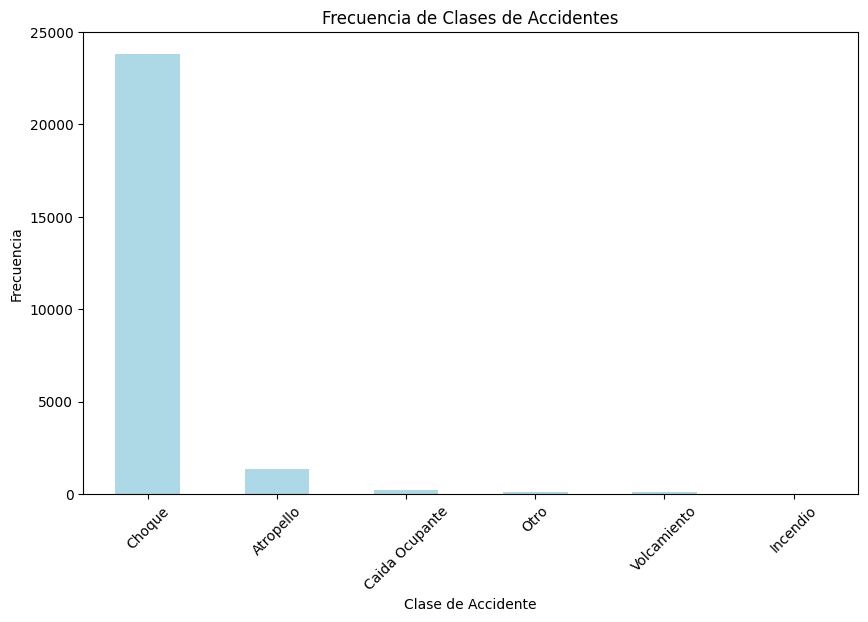

CLASE_ACCIDENTE
Choque            23819
Atropello          1344
Caida Ocupante      194
Otro                123
Volcamiento         117
Incendio             13
Name: count, dtype: int64


In [ ]:
# Gráficos de barras para variables categóricas
plt.figure(figsize=(10, 6))
dfacci['CLASE_ACCIDENTE'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Frecuencia de Clases de Accidentes')
plt.xlabel('Clase de Accidente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

counts = dfacci['CLASE_ACCIDENTE'].value_counts()
print(counts)

In [ ]:
dfacci['GRAVEDAD_ACCIDENTE'].isna().sum()

0

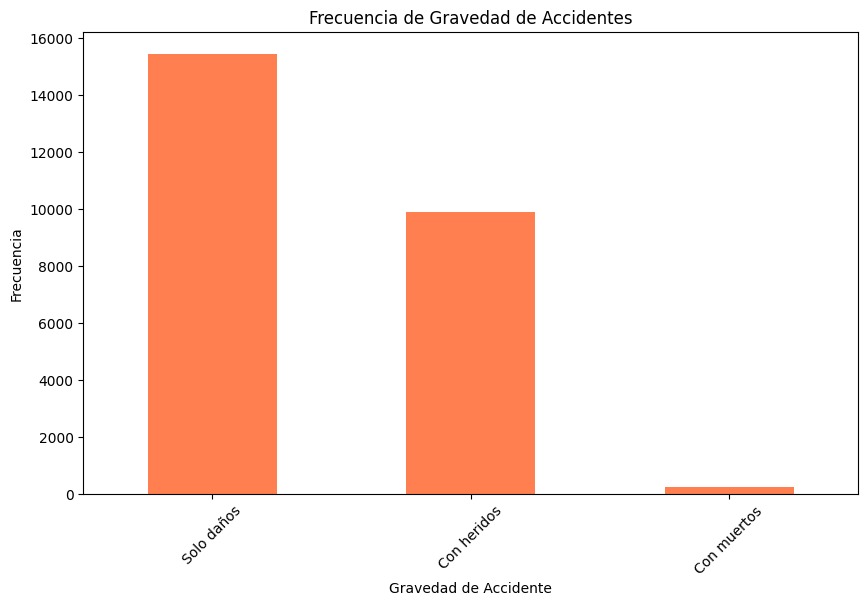

GRAVEDAD_ACCIDENTE
Solo daños     15457
Con heridos     9901
Con muertos      252
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
dfacci['GRAVEDAD_ACCIDENTE'].value_counts().plot(kind='bar', color='#FF7F50')
plt.title('Frecuencia de Gravedad de Accidentes')
plt.xlabel('Gravedad de Accidente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

counts = dfacci['GRAVEDAD_ACCIDENTE'].value_counts()
print(counts)


In [ ]:
dfacci['MES_ACCIDENTE'].isna().sum()

0

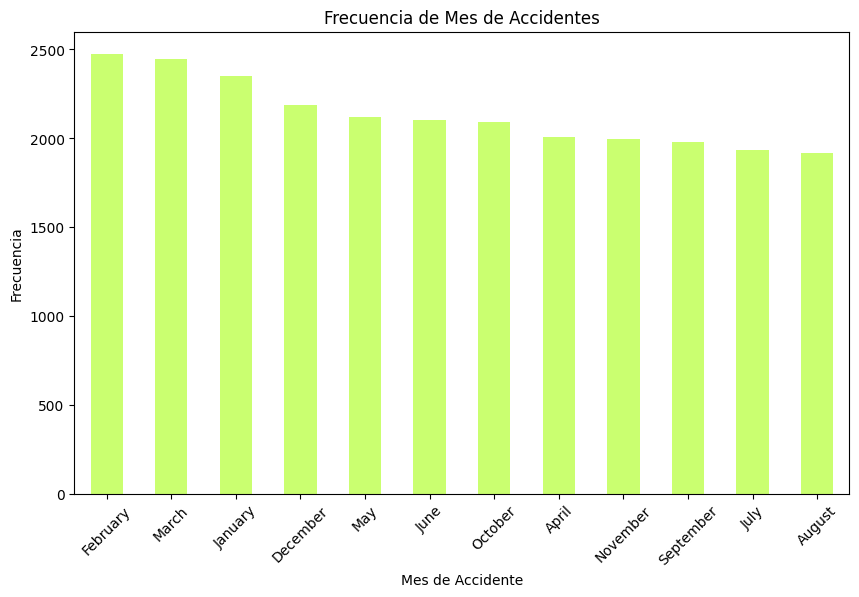

MES_ACCIDENTE
February     2477
March        2446
January      2349
December     2189
May          2121
June         2103
October      2090
April        2010
November     1995
September    1980
July         1932
August       1918
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
dfacci['MES_ACCIDENTE'].value_counts().plot(kind='bar', color='#CAFF70')
plt.title('Frecuencia de Mes de Accidentes')
plt.xlabel('Mes de Accidente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

counts = dfacci['MES_ACCIDENTE'].value_counts()
print(counts)

In [ ]:
dfacci['DIA_ACCIDENTE'].isna().sum()

0

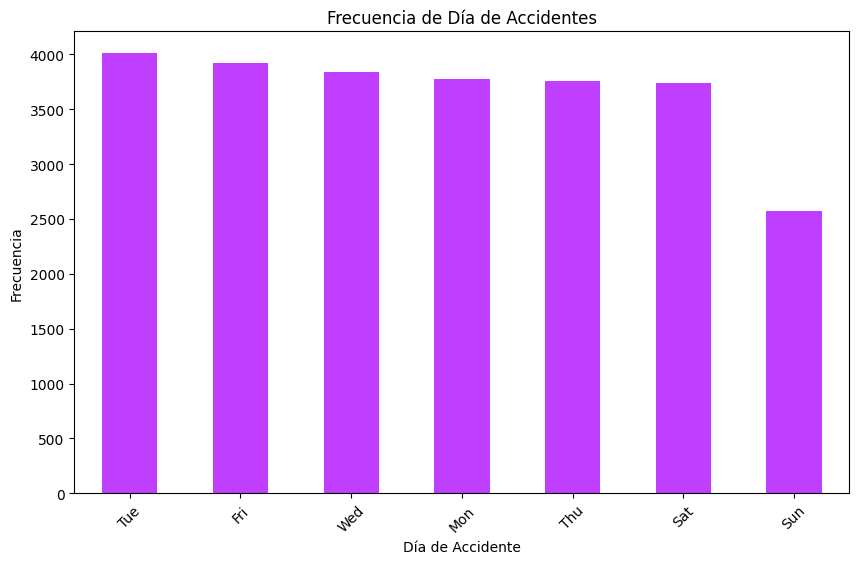

DIA_ACCIDENTE
Tue    4009
Fri    3920
Wed    3839
Mon    3774
Thu    3756
Sat    3735
Sun    2577
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
dfacci['DIA_ACCIDENTE'].value_counts().plot(kind='bar', color='#BF3EFF')
plt.title('Frecuencia de Día de Accidentes')
plt.xlabel('Día de Accidente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

counts = dfacci['DIA_ACCIDENTE'].value_counts()
print(counts)

En esta sección, presentamos gráficas que muestran la distribución de los datos en relacion de varias categorías relacionadas con los accidentes.

-   En la gráfica de **Clase de Accidente**, la mayoría de los datos se concentran en la categoría "Choque", con **23,819 casos**, mientras que la menor concentración se encuentra en "Incendio", con solo **13 casos**.

-   En la gráfica de **Gravedad de Accidentes**, la mayor concentración está en "Solo daños", con **15,457 casos**, y la menor en "De muertos", con **252 casos**.

-   En la gráfica de **Mes de Accidente**, febrero tiene el mayor número de accidentes, con **2,477**, y agosto tiene el menor, con **1,918 accidentes** en el mes.

-   En la gráfica de **Día de Accidente**, el día con mayor concentración de accidentes es el martes, con **4,009**, y el día con menor concentración es el domingo, con **2,577**.

### Fecha de Accidentes

In [ ]:
dfacci['FECHA_ACCIDENTE'] = pd.to_datetime(dfacci['FECHA_ACCIDENTE'])
dfacci['MES_ANO'] = dfacci['FECHA_ACCIDENTE'].dt.to_period('M')  # Agrupar por mes y año
frecuencia_accidentes = dfacci.groupby('MES_ANO').size()


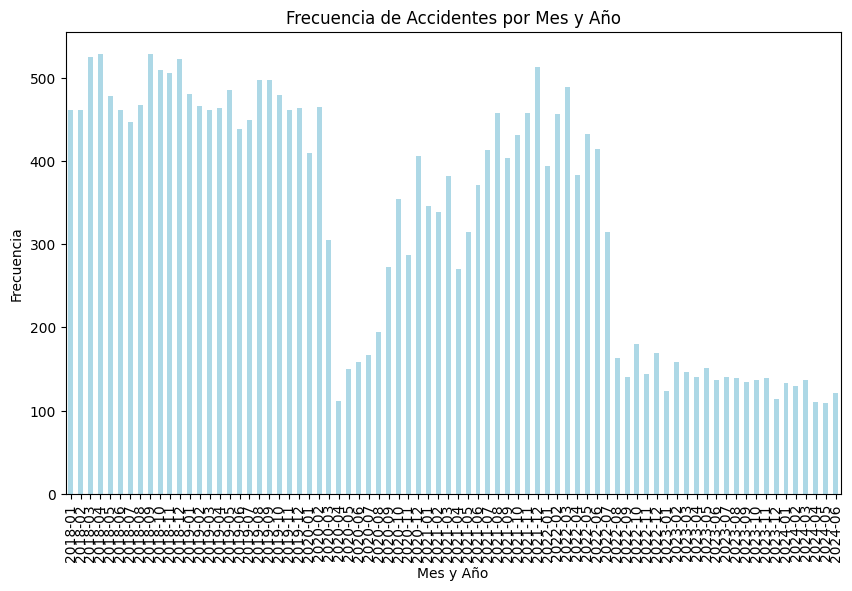

In [ ]:
plt.figure(figsize=(10, 6))
frecuencia_accidentes.plot(kind='bar', color='lightblue')
plt.title('Frecuencia de Accidentes por Mes y Año')
plt.xlabel('Mes y Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


### Hora de Accidente

In [ ]:
dfacci['HORA_ACCIDENTE_HOUR'] = dfacci['HORA_ACCIDENTE'].apply(lambda x: x.hour if pd.notnull(x) else None)
dfacci['INTERVALO_HORAS'] = (dfacci['HORA_ACCIDENTE_HOUR'] // 2) * 2
frecuencia_accidentes_intervalos = dfacci.groupby('INTERVALO_HORAS').size()


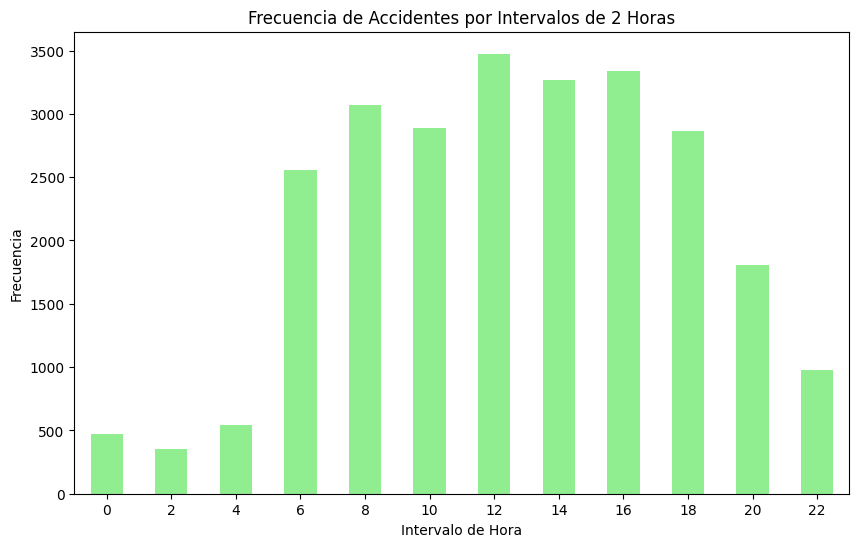

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
frecuencia_accidentes_intervalos.plot(kind='bar', color='lightgreen')
plt.title('Frecuencia de Accidentes por Intervalos de 2 Horas')
plt.xlabel('Intervalo de Hora')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

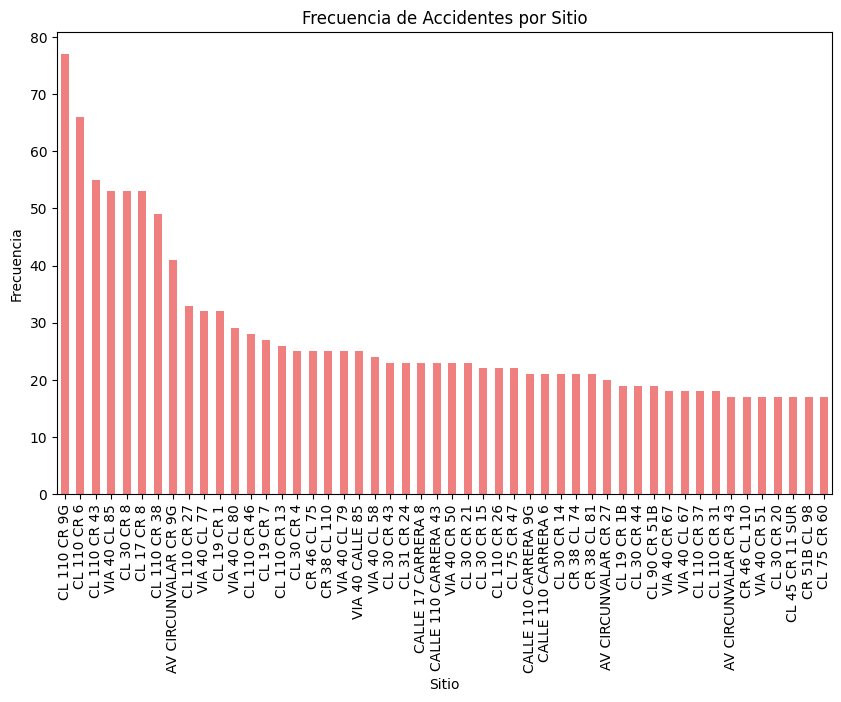

SITIO_EXACTO_ACCIDENTE
CL 110 CR 9G               77
CL 110 CR 6                66
CL 110 CR 43               55
VIA 40 CL 85               53
CL 30 CR 8                 53
                           ..
CALLE 110 CRA 96            1
CR 76 88 20                 1
CR 56 70 100                1
CL 55 CR 32                 1
CARRERA 43 CON CALLE 41     1
Name: count, Length: 15365, dtype: int64


In [ ]:
# Gráfica de frecuencia de accidentes por sitio exacto
top_sites = dfacci['SITIO_EXACTO_ACCIDENTE'].value_counts().head(50)
plt.figure(figsize=(10, 6))
top_sites.plot(kind='bar', color='lightcoral')
plt.title('Frecuencia de Accidentes por Sitio')
plt.xlabel('Sitio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

counts = dfacci['SITIO_EXACTO_ACCIDENTE'].value_counts()
print(counts)

In [ ]:
def print_contingency_with_margins(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])

    margin_row = contingency_table.sum(axis=1).rename('Total')
    margin_col = contingency_table.sum(axis=0).rename('Total')

    # Añadir los márgenes
    contingency_table_with_margins = contingency_table.copy()
    contingency_table_with_margins.loc['Total'] = margin_col
    contingency_table_with_margins['Total'] = pd.concat([margin_row, margin_col])

    print("Tabla de contingencia con márgenes:")
    print(contingency_table_with_margins)
    return contingency_table


In [ ]:
# Prueba Chi-cuadrado
def chi2_test(contingency_table):
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    print("\nChi-cuadrado test:")
    print(f"Chi2: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

In [ ]:
# Análisis 1
contingency1 = print_contingency_with_margins(dfacci, 'CLASE_ACCIDENTE', 'GRAVEDAD_ACCIDENTE')
chi2_test(contingency1)

Tabla de contingencia con márgenes:
GRAVEDAD_ACCIDENTE  Con heridos  Con muertos  Solo daños    Total
CLASE_ACCIDENTE                                                  
Atropello                  1266           78           0   1344.0
Caida Ocupante              188            6           0    194.0
Choque                     8277          157       15385  23819.0
Incendio                      1            0          12     13.0
Otro                         83            8          32    123.0
Volcamiento                  86            3          28    117.0
Total                      9901          252       15457      NaN

Chi-cuadrado test:
Chi2: 2846.869672197602
P-value: 0.0
Degrees of freedom: 10


In [ ]:
# Análisis 2
contingency2 = print_contingency_with_margins(dfacci, 'DIA_ACCIDENTE', 'GRAVEDAD_ACCIDENTE')
chi2_test(contingency2)

Tabla de contingencia con márgenes:
GRAVEDAD_ACCIDENTE  Con heridos  Con muertos  Solo daños   Total
DIA_ACCIDENTE                                                   
Fri                        1468           33        2419  3920.0
Mon                        1507           43        2224  3774.0
Sat                        1474           36        2225  3735.0
Sun                        1256           55        1266  2577.0
Thu                        1355           28        2373  3756.0
Tue                        1439           25        2545  4009.0
Wed                        1402           32        2405  3839.0
Total                      9901          252       15457     NaN

Chi-cuadrado test:
Chi2: 206.58344840292366
P-value: 1.4238002473724924e-37
Degrees of freedom: 12


In [ ]:
# Análisis 3
contingency3 = print_contingency_with_margins(dfacci, 'MES_ACCIDENTE', 'CLASE_ACCIDENTE')
chi2_test(contingency3)


Tabla de contingencia con márgenes:
CLASE_ACCIDENTE  Atropello  Caida Ocupante  Choque  Incendio  Otro  \
MES_ACCIDENTE                                                        
April                   98              20    1871         0    12   
August                  83              13    1800         1    12   
December               121              21    2028         2    10   
February               130              15    2310         1     7   
January                133              20    2181         2     9   
July                    83               5    1831         1     6   
June                   114              12    1952         0    11   
March                  126              20    2268         1    17   
May                    104              23    1968         2    11   
November               110              16    1849         0    11   
October                123              16    1930         2     8   
September              119              13    1831    

### Distribución por Mes y Clase de Accidente

-   La clase de accidente más frecuente es **Choque**, con 23,819 casos, mientras que la menos común es **Incendio** con solo 13 incidentes.
-   Los accidentes parecen estar distribuidos de manera más uniforme a lo largo de los meses, con **febrero** registrando la mayor cantidad de accidentes (2,477) y **agosto** la menor (1,918).

### Distribución por Gravedad de Accidentes y Clase de Accidente

-   Los accidentes con **Solo daños** son los más comunes, con 15,457 casos, en contraste con los accidentes **Con muertos**, que suman 252 casos.
-   En particular, los **Choques** representan una gran mayoría de los casos de **Solo daños** (15,385 de 15,457).

### Distribución por Día de la Semana y Gravedad de Accidentes

-   Los días de la semana también muestran variaciones en la cantidad de accidentes, con el **jueves** registrando 4,009 accidentes y el **domingo** siendo el día con menos accidentes (2,577).
-   Los días más peligrosos, en términos de muertes, parecen ser el **domingo**, con 55 muertes reportadas en accidentes.

### Pruebas de Chi-cuadrado

-   En todos los casos, las pruebas de Chi-cuadrado muestran p-valores mayores a 0.05, lo que sugiere que no hay una asociación estadísticamente significativa entre los meses y las clases de accidentes.
-   Sin embargo, las asociaciones entre las clases de accidentes, la gravedad de los accidentes y los días de la semana sí parecen ser significativas.

## Analisis de las variablez numericas

In [ ]:
# Análisis de variables numéricas
print(dfacci['CANT_HERIDOS_EN _SITIO_ACCIDENTE'].describe())
print(dfacci['CANT_MUERTOS_EN _SITIO_ACCIDENTE'].describe())
print(dfacci['CANTIDAD_ACCIDENTES'].describe())
print(dfacci['AÑO_ACCIDENTE'].describe())

count    9984.000000
mean        1.471655
std         1.156751
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        42.000000
Name: CANT_HERIDOS_EN _SITIO_ACCIDENTE, dtype: float64
count    252.000000
mean       1.035714
std        0.185946
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: CANT_MUERTOS_EN _SITIO_ACCIDENTE, dtype: float64
count    25610.000000
mean         1.000195
std          0.013972
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: CANTIDAD_ACCIDENTES, dtype: float64
count    25610.000000
mean      2020.100547
std          1.713887
min       2018.000000
25%       2019.000000
50%       2020.000000
75%       2021.000000
max       2024.000000
Name: AÑO_ACCIDENTE, dtype: float64


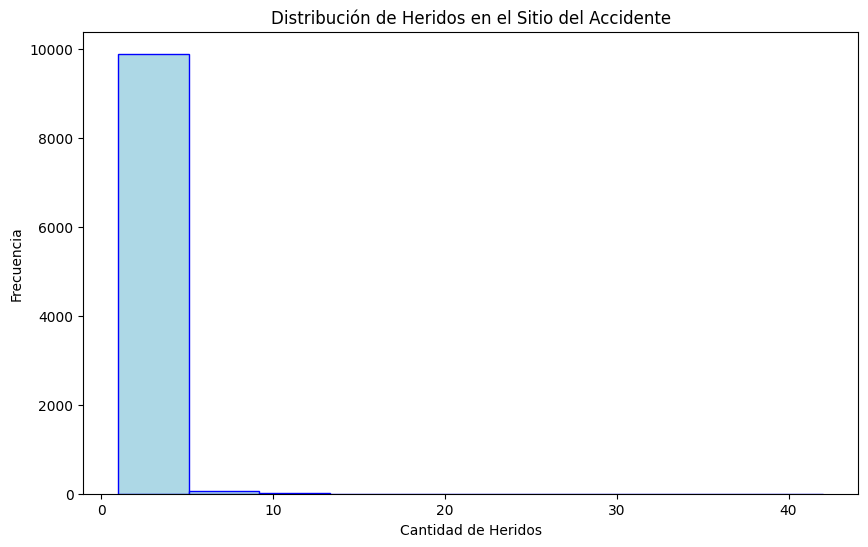

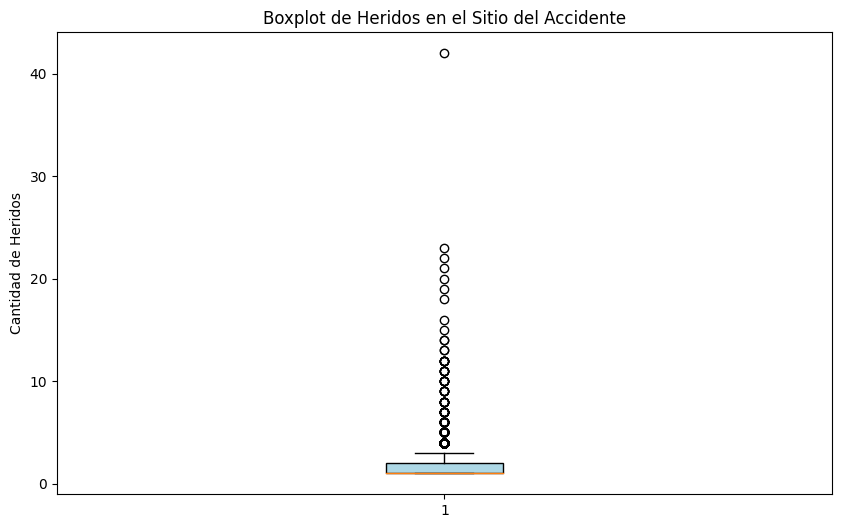

In [ ]:
# Histograma y boxplot de heridos en el sitio del accidente
plt.figure(figsize=(10, 6))
plt.hist(dfacci['CANT_HERIDOS_EN _SITIO_ACCIDENTE'], color='lightblue', edgecolor='blue')
plt.title('Distribución de Heridos en el Sitio del Accidente')
plt.xlabel('Cantidad de Heridos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(dfacci['CANT_HERIDOS_EN _SITIO_ACCIDENTE'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot de Heridos en el Sitio del Accidente')
plt.ylabel('Cantidad de Heridos')
plt.show()

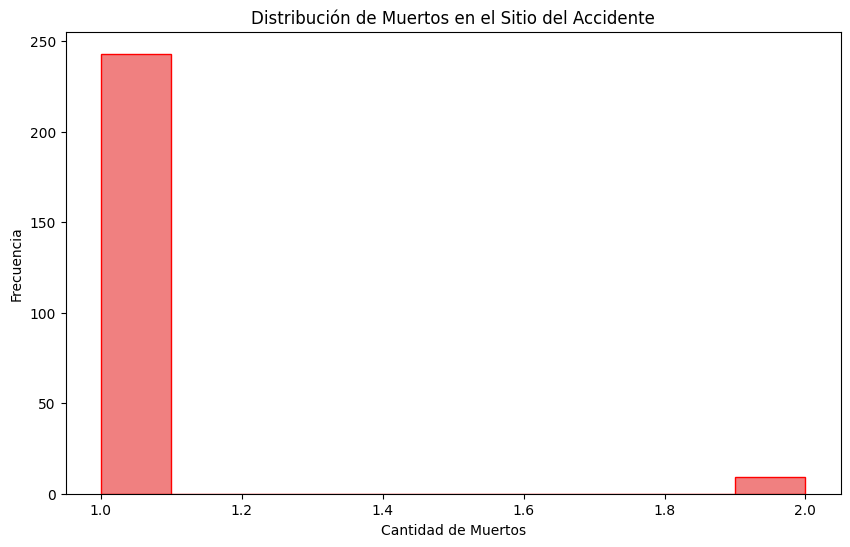

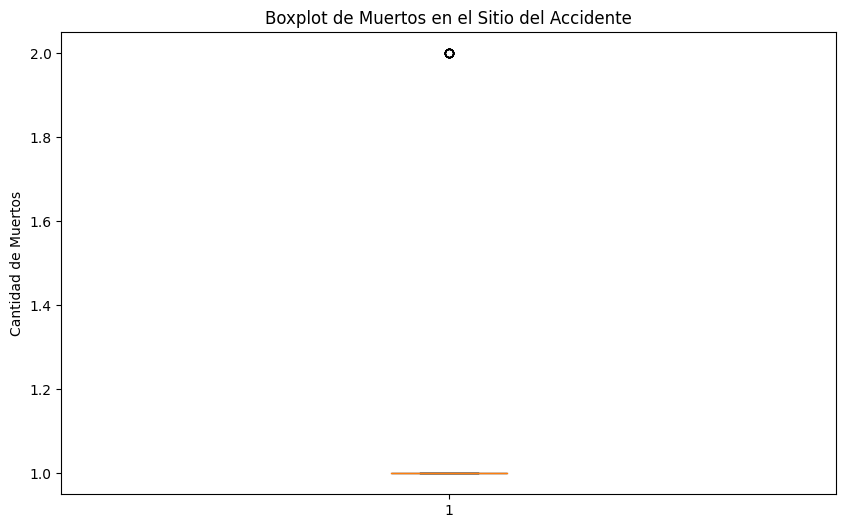

In [ ]:
# Histograma y boxplot de muertos en el sitio del accidente
plt.figure(figsize=(10, 6))
plt.hist(dfacci['CANT_MUERTOS_EN _SITIO_ACCIDENTE'], color='lightcoral', edgecolor='red')
plt.title('Distribución de Muertos en el Sitio del Accidente')
plt.xlabel('Cantidad de Muertos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(dfacci['CANT_MUERTOS_EN _SITIO_ACCIDENTE'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Boxplot de Muertos en el Sitio del Accidente')
plt.ylabel('Cantidad de Muertos')
plt.show()


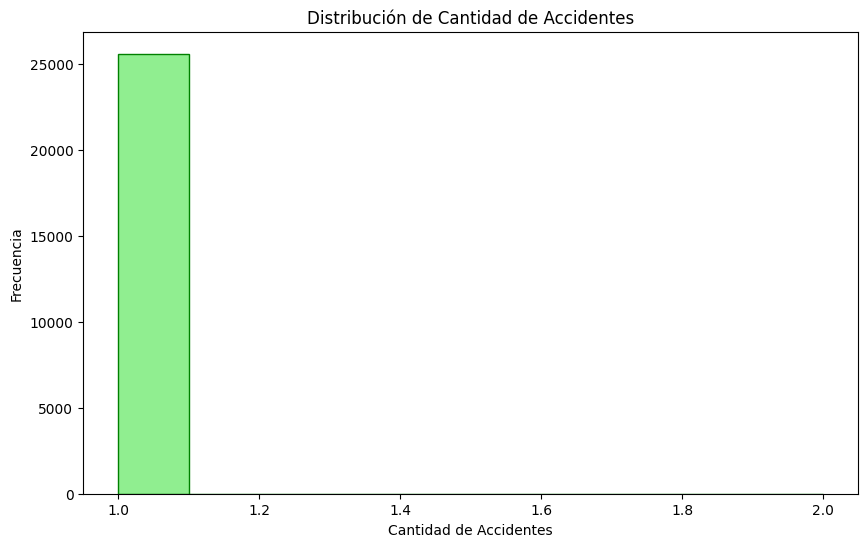

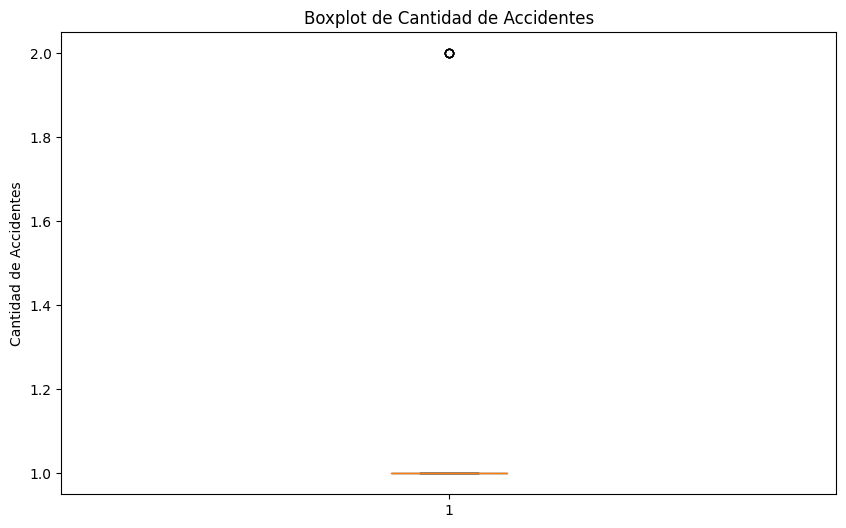

In [ ]:
# Histograma y boxplot de cantidad de accidentes
plt.figure(figsize=(10, 6))
plt.hist(dfacci['CANTIDAD_ACCIDENTES'], color='lightgreen', edgecolor='green')
plt.title('Distribución de Cantidad de Accidentes')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(dfacci['CANTIDAD_ACCIDENTES'].dropna(), patch_artist=True, boxprops=dict(facecolor='darkgreen'))
plt.title('Boxplot de Cantidad de Accidentes')
plt.ylabel('Cantidad de Accidentes')
plt.show()

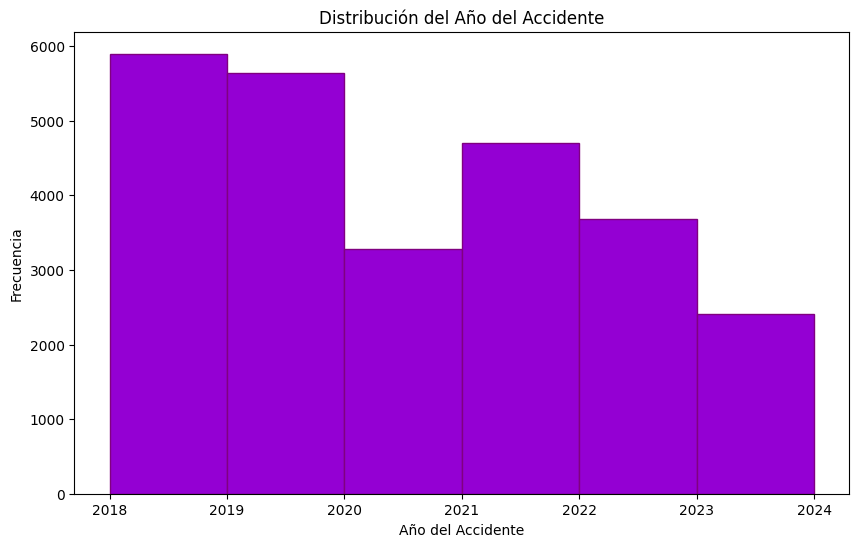

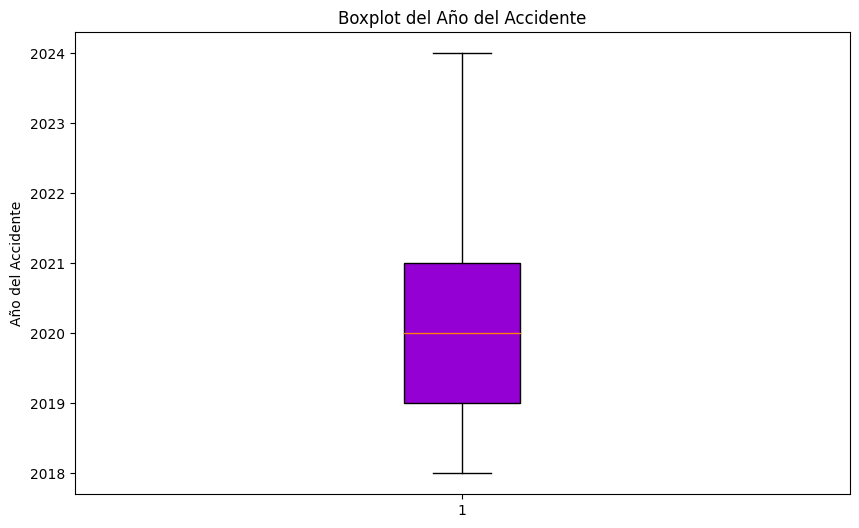

In [ ]:
# Histograma y boxplot del año del accidente
plt.figure(figsize=(10, 6))
plt.hist(dfacci['AÑO_ACCIDENTE'].dropna(), bins=range(dfacci['AÑO_ACCIDENTE'].min(), dfacci['AÑO_ACCIDENTE'].max() + 1), color='DarkViolet', edgecolor='purple')
plt.title('Distribución del Año del Accidente')
plt.xlabel('Año del Accidente')
plt.ylabel('Frecuencia')
plt.xticks(range(dfacci['AÑO_ACCIDENTE'].min(), dfacci['AÑO_ACCIDENTE'].max() + 1))  # Asegura que cada año esté representado en el eje x
plt.show()


plt.figure(figsize=(10, 6))
plt.boxplot(dfacci['AÑO_ACCIDENTE'].dropna(), patch_artist=True, boxprops=dict(facecolor='DarkViolet'))
plt.title('Boxplot del Año del Accidente')
plt.ylabel('Año del Accidente')
plt.show()

### Análisis de Variables Numéricas

1. **Distribución de Heridos en el Sitio del Accidente**:
   - Se observó que la mediana y la moda en la cantidad de heridos en el sitio del accidente es de 1. Sin embargo, la media muestra una ligera elevación, lo que sugiere la presencia de algunos casos con un número significativo de heridos.

2. **Distribución de Muertos en el Sitio del Accidente**:
   - Similar a la variable anterior, la mediana y moda son de 1, lo que indica que la mayoría de los accidentes reportados tienen un solo fallecido. La distribución parece bastante homogénea, con un máximo de 2 muertos por accidente y presencia de valores NA.

3. **Cantidad de Accidentes**:
   - La variable `CANTIDAD_ACCIDENTES` parece estar repartido en 1 y 2, con la mayoría de los registros reportando un solo accidente y muy pocos casos con dos accidentes.

4. **Distribución por Años**:
   - El análisis de la variable `AÑO_ACCIDENTE` muestra que los datos abarcan desde 2018 hasta 2024. Hay una disminución notable en los reportes de accidentes en los últimos años.

### Mapa de Calor de Correlaciones

In [ ]:
dfacci['CANTIDAD_ACCIDENTES'] = pd.to_numeric(dfacci['CANTIDAD_ACCIDENTES'])

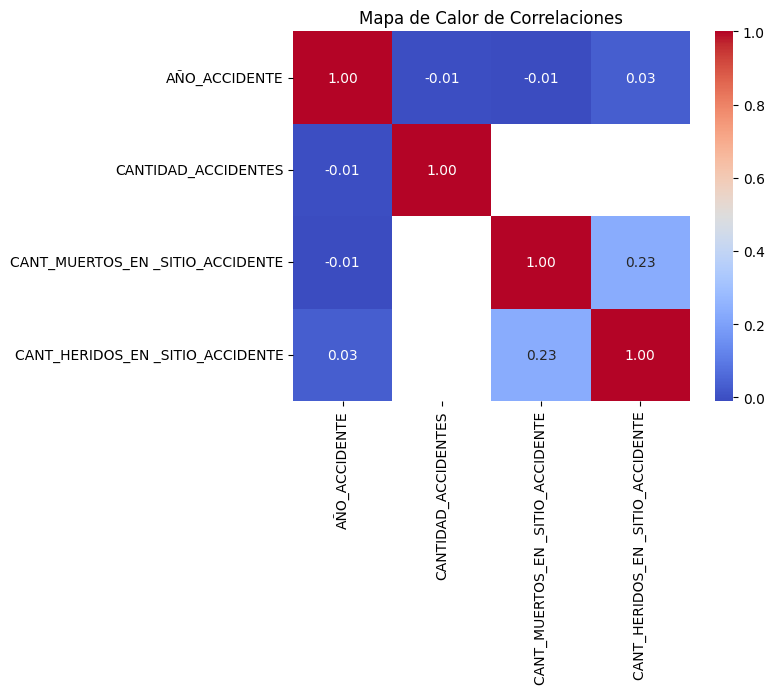

In [ ]:
# Mapa de calor de correlaciones
correlation_matrix = dfacci[['AÑO_ACCIDENTE', 'CANTIDAD_ACCIDENTES', 'CANT_MUERTOS_EN _SITIO_ACCIDENTE', 'CANT_HERIDOS_EN _SITIO_ACCIDENTE']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Se elaboró un mapa de calor para evaluar las correlaciones entre las variables numéricas:

- Una correlación moderada entre `CANT_HERIDOS_EN._SITIO_ACCIDENTE` y `CANT_MUERTOS_EN._SITIO_ACCIDENTE` (0.23), lo cual es lógico, dado que en accidentes con más heridos es más probable que también haya fallecidos.
- `CANTIDAD_ACCIDENTES` muestra una correlación positiva perfecta consigo misma y con `AÑO_ACCIDENTE`, lo cual es esperable.
- Las correlaciones entre otras variables son bajas.

### Tablas de Frecuencia

In [ ]:
# Tablas de frecuencia
print(dfacci['CANT_HERIDOS_EN _SITIO_ACCIDENTE'].value_counts())
print(dfacci['CANT_MUERTOS_EN _SITIO_ACCIDENTE'].value_counts())
print(dfacci['CANTIDAD_ACCIDENTES'].value_counts())
print(dfacci['AÑO_ACCIDENTE'].value_counts())


CANT_HERIDOS_EN _SITIO_ACCIDENTE
1.0     6911
2.0     2301
3.0      469
4.0      155
5.0       57
6.0       29
7.0       14
8.0        9
12.0       7
10.0       7
11.0       6
9.0        6
13.0       2
14.0       2
19.0       1
18.0       1
23.0       1
21.0       1
20.0       1
42.0       1
16.0       1
22.0       1
15.0       1
Name: count, dtype: int64
CANT_MUERTOS_EN _SITIO_ACCIDENTE
1.0    243
2.0      9
Name: count, dtype: int64
CANTIDAD_ACCIDENTES
1    25605
2        5
Name: count, dtype: int64
AÑO_ACCIDENTE
2018    5898
2019    5645
2021    4700
2022    3683
2020    3281
2023    1662
2024     741
Name: count, dtype: int64


Se presentan las tablas de frecuencia para las variables categóricas y numéricas discretas:

- **Heridos en el Sitio del Accidente**: La mayoría de los registros indican 1 herido, con una disminución notable en la frecuencia de valores más altos.
- **Muertos en el Sitio del Accidente**: De manera similar, la mayoría de los registros reportan 1 muerto, con muy pocos casos de 2 muertos.
- **Cantidad de Accidentes**: Como se mencionó anteriormente, la mayoría de los registros reportan un solo accidente.
- **Distribución por Años**: Los años 2018 y 2019 tienen la mayor cantidad de reportes, con una disminución gradual en los años anteriores.


In [ ]:
df2020 = dfacci[dfacci['AÑO_ACCIDENTE'] == 2020]
print(df2020.head())

dfheri = dfacci[dfacci['CANT_HERIDOS_EN _SITIO_ACCIDENTE'] > 0]
print(dfheri.head())

dfchoq = dfacci[dfacci['CLASE_ACCIDENTE'] == "Choque"]
print(dfchoq.head())

dfmanan = dfacci[dfacci['MES_ACCIDENTE'] == "July"]
print(dfmanan.head())

dfsit = dfacci[dfacci['SITIO_EXACTO_ACCIDENTE'] == "CL 110 CR 9G"]
print(dfsit.head())


               FECHA_ACCIDENTE HORA_ACCIDENTE GRAVEDAD_ACCIDENTE  \
11543  2020-01-01T00:00:00.000    05:00:00:pm         Solo daños   
11544  2020-01-01T00:00:00.000    05:30:00:am         Solo daños   
11545  2020-01-01T00:00:00.000    05:40:00:pm         Solo daños   
11546  2020-01-01T00:00:00.000    08:00:00:pm        Con heridos   
11547  2020-01-01T00:00:00.000    08:10:00:pm         Solo daños   

      CLASE_ACCIDENTE SITIO_EXACTO_ACCIDENTE  \
11543          Choque   AV CIRCUNVALAR CL 96   
11544          Choque            CR 10 CL 10   
11545          Choque           CL 114 CR 42   
11546          Choque            CL 86 CR 9L   
11547          Choque         CL 72 CR 44 25   

       CANT_HERIDOS_EN _SITIO_ACCIDENTE  CANT_MUERTOS_EN _SITIO_ACCIDENTE  \
11543                               NaN                               NaN   
11544                               NaN                               NaN   
11545                               NaN                               N

Observamos cómo se distribuyen los accidentes en el año 2020, además de los accidentes que resultan en uno o más heridos. También analizamos los accidentes clasificados como choques y aquellos accidentes que pasaron en el mes de "July". Por último, se muestra el lugar que previamente se identificó como el sitio con más accidentes.

## Análisis de los NA's:

In [ ]:
total_na = dfacci.isna().sum().sum()
print(f"Total NA en el DataFrame: {total_na}")

Total NA en el DataFrame: 40984


In [ ]:
dfacci.isnull().sum()

,0
FECHA_ACCIDENTE,0
HORA_ACCIDENTE,0
GRAVEDAD_ACCIDENTE,0
CLASE_ACCIDENTE,0
SITIO_EXACTO_ACCIDENTE,0
CANT_HERIDOS_EN _SITIO_ACCIDENTE,15626
CANT_MUERTOS_EN _SITIO_ACCIDENTE,25358
CANTIDAD_ACCIDENTES,0
AÑO_ACCIDENTE,0
MES_ACCIDENTE,0


In [ ]:
# Valores únicos en una columna específica
unique_cant_heridos = dfacci['CANT_HERIDOS_EN _SITIO_ACCIDENTE'].unique()
unique_cant_muertos = dfacci['CANT_MUERTOS_EN _SITIO_ACCIDENTE'].unique()

print("Valores únicos en CANT_HERIDOS_EN _SITIO_ACCIDENTE:")
print(unique_cant_heridos)

print("Valores únicos en CANT_MUERTOS_EN _SITIO_ACCIDENTE:")
print(unique_cant_muertos)


Valores únicos en CANT_HERIDOS_EN _SITIO_ACCIDENTE:
[ 1. nan  3.  2.  5.  7.  8.  4. 11.  6. 10. 12. 20. 22. 13.  9. 16. 14.
 42. 19. 21. 23. 18. 15.]
Valores únicos en CANT_MUERTOS_EN _SITIO_ACCIDENTE:
[nan  1.  2.]


Al analizar los valores NA en las variables **CANT_HERIDOS_EN._SITIO_ACCIDENTE** y **CANT_MUERTOS_EN._SITIO_ACCIDENTE**, se puede deducir que estos representan un "0" en esos casos, ya que los valores presentes en estas variables no incluyen el 0, como se observó anteriormente. No obstante, vamos a proceder con una serie de imputaciones utilizando los métodos dados en clase, como **"norm.nob"**, **"norm"**, **"pmm"** y **"norm.predict"**.

In [ ]:
df_subset = pd.DataFrame({
    'CANT_HERIDOS_ACCIDENTE': dfacci['CANT_HERIDOS_EN _SITIO_ACCIDENTE'],
    'CANT_MUERTOS_ACCIDENTE': dfacci['CANT_MUERTOS_EN _SITIO_ACCIDENTE']
})

In [ ]:
# Método 'pmm'
pmm_imputer = IterativeImputer()
df_imputed_pmm = pd.DataFrame(pmm_imputer.fit_transform(df_subset), columns=df_subset.columns)
print("Imputación con método 'pmm':")
print(df_imputed_pmm.head())

# Método 'norm.predict'
norm_predict_imputer = IterativeImputer()
df_imputed_norm_predict = pd.DataFrame(norm_predict_imputer.fit_transform(df_subset), columns=df_subset.columns)
print("Imputación con método 'norm.predict':")
print(df_imputed_norm_predict.head())

# Método 'norm.nob'
norm_nob_imputer = SimpleImputer(strategy='mean')
df_imputed_norm_nob = pd.DataFrame(norm_nob_imputer.fit_transform(df_subset), columns=df_subset.columns)
print("Imputación con método'norm.nob':")
print(df_imputed_norm_nob.head())

# Método 'norm'
norm_imputer = SimpleImputer(strategy='median')
df_imputed_norm = pd.DataFrame(norm_imputer.fit_transform(df_subset), columns=df_subset.columns)
print("Imputación con método'norm':")
print(df_imputed_norm.head())

Imputación con método 'pmm':
   CANT_HERIDOS_ACCIDENTE  CANT_MUERTOS_ACCIDENTE
0                1.000000                1.013378
1                1.467677                1.037679
2                1.467677                1.037679
3                1.467677                1.037679
4                1.467677                1.037679
Imputación con método 'norm.predict':
   CANT_HERIDOS_ACCIDENTE  CANT_MUERTOS_ACCIDENTE
0                1.000000                1.013378
1                1.467677                1.037679
2                1.467677                1.037679
3                1.467677                1.037679
4                1.467677                1.037679
Imputación con método'norm.nob':
   CANT_HERIDOS_ACCIDENTE  CANT_MUERTOS_ACCIDENTE
0                1.000000                1.035714
1                1.471655                1.035714
2                1.471655                1.035714
3                1.471655                1.035714
4                1.471655                1.035714


Observamos cómo, mediante los métodos de imputación, se realizó el respectivo reemplazo de las variables con valores NA según el método utilizado.

## Analisis de los datos atipicos:

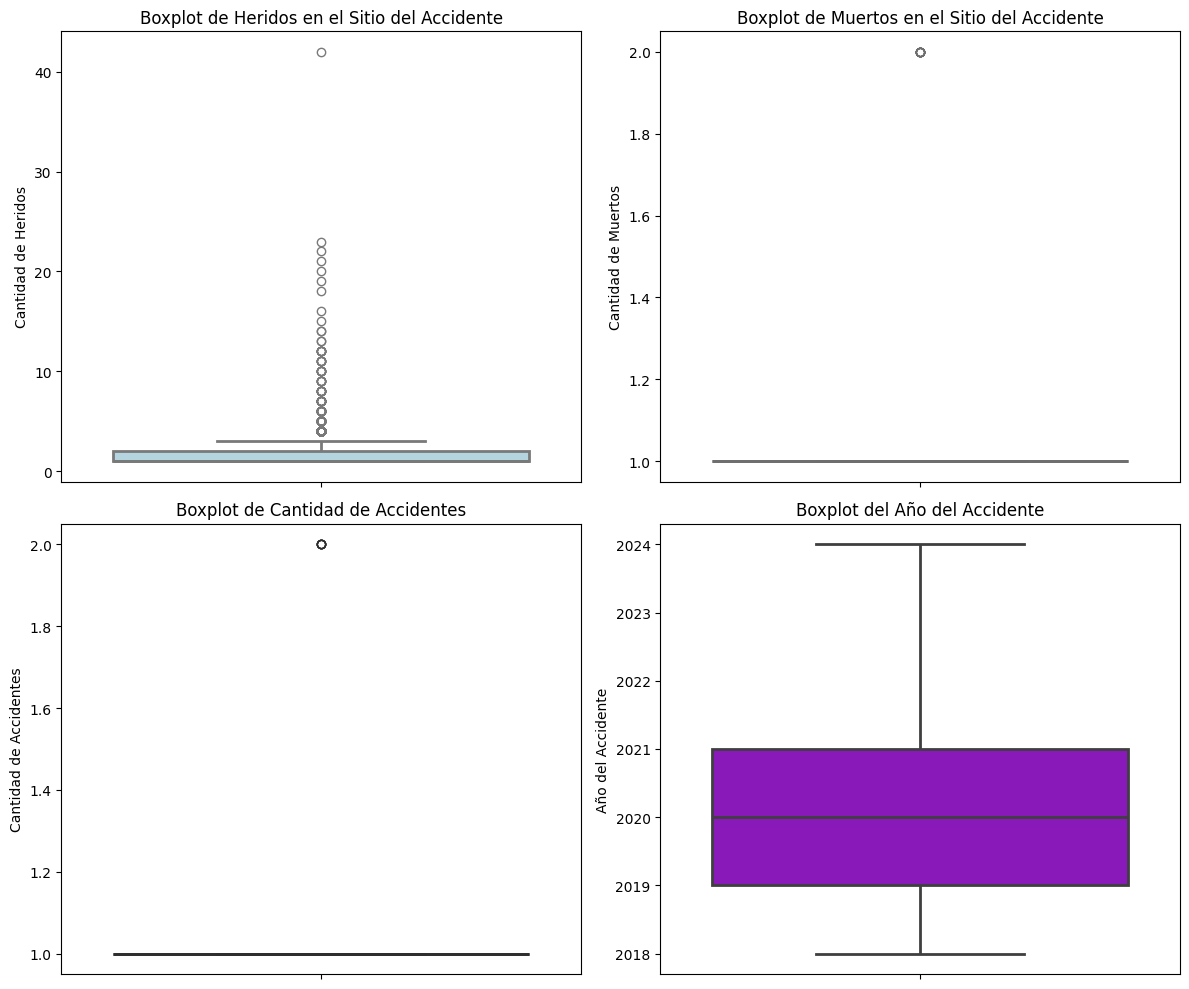

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot de Heridos en el Sitio del Accidente
sns.boxplot(y=dfacci['CANT_HERIDOS_EN _SITIO_ACCIDENTE'],
            color="lightblue",
            linewidth=2,
            ax=axes[0, 0])
axes[0, 0].set_title("Boxplot de Heridos en el Sitio del Accidente")
axes[0, 0].set_ylabel("Cantidad de Heridos")

# Boxplot de Muertos en el Sitio del Accidente
sns.boxplot(y=dfacci['CANT_MUERTOS_EN _SITIO_ACCIDENTE'],
            color="lightcoral",
            linewidth=2,
            ax=axes[0, 1])
axes[0, 1].set_title("Boxplot de Muertos en el Sitio del Accidente")
axes[0, 1].set_ylabel("Cantidad de Muertos")

# Boxplot de Cantidad de Accidentes
sns.boxplot(y=dfacci['CANTIDAD_ACCIDENTES'],
            color="DarkOliveGreen",
            linewidth=2,
            ax=axes[1, 0])
axes[1, 0].set_title("Boxplot de Cantidad de Accidentes")
axes[1, 0].set_ylabel("Cantidad de Accidentes")

# Boxplot del Año del Accidente
sns.boxplot(y=dfacci['AÑO_ACCIDENTE'],
            color="DarkViolet",
            linewidth=2,
            ax=axes[1, 1])
axes[1, 1].set_title("Boxplot del Año del Accidente")
axes[1, 1].set_ylabel("Año del Accidente")

plt.tight_layout()
plt.show()

## Análisis de Valores Atípicos con el Test de Grubbs

**CANT_HERIDOS_EN._SITIO_ACCIDENTE**, **CANT_MUERTOS_EN._SITIO_ACCIDENTE**, **CANTIDAD_ACCIDENTES**, y **AÑO_ACCIDENTE**. A continuación, se describen los resultados obtenidos para cada variable.



### Funciones para tratar datos atipicos

In [ ]:
def grubbs_test(data):
    data = np.array(data.dropna())
    if len(data) < 2:
        return np.nan, np.nan  # Necesitamos al menos 2 puntos de datos para la prueba

    # Prueba de Grubbs para detectar un outlier
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)

    # Calcular el estadístico de prueba para el outlier máximo
    G = max(abs(data - mean)) / std_dev
    p_value = 1 - stats.norm.cdf(G)

    return G, p_value

In [ ]:
def grubbs_test_opposite(data):
    G, p_value = grubbs_test(data)
    return G, 1 - p_value if not np.isnan(p_value) else np.nan

### Hipótesis

- **Hipótesis nula (H0):**  El valor más alto o más bajo no es un dato atipico.
- **Hipótesis alternativa (H1):** El valor más alto o más bajo es un dato atipico.

In [ ]:
results = {}

# Para CANT_HERIDOS_EN._SITIO_ACCIDENTE
results['CANT_HERIDOS_EN _SITIO_ACCIDENTE'] = {
    'Grubbs Test': grubbs_test(dfacci['CANT_HERIDOS_EN _SITIO_ACCIDENTE']),
    'Grubbs Test Opposite': grubbs_test_opposite(dfacci['CANT_HERIDOS_EN _SITIO_ACCIDENTE'])
}

# Para CANT_MUERTOS_EN._SITIO_ACCIDENTE
results['CANT_MUERTOS_EN _SITIO_ACCIDENTE'] = {
    'Grubbs Test': grubbs_test(dfacci['CANT_MUERTOS_EN _SITIO_ACCIDENTE']),
    'Grubbs Test Opposite': grubbs_test_opposite(dfacci['CANT_MUERTOS_EN _SITIO_ACCIDENTE'])
}

# Para CANTIDAD_ACCIDENTES
results['CANTIDAD_ACCIDENTES'] = {
    'Grubbs Test': grubbs_test(dfacci['CANTIDAD_ACCIDENTES']),
    'Grubbs Test Opposite': grubbs_test_opposite(dfacci['CANTIDAD_ACCIDENTES'])
}

# Para AÑO_ACCIDENTE
results['AÑO_ACCIDENTE'] = {
    'Grubbs Test': grubbs_test(dfacci['AÑO_ACCIDENTE']),
    'Grubbs Test Opposite': grubbs_test_opposite(dfacci['AÑO_ACCIDENTE'])
}

In [ ]:
# Imprimir los resultados
for key, value in results.items():
    print(f"Resultados para {key}:")
    print(f"  Grubbs Test: Estadístico = {value['Grubbs Test'][0]}, p-value = {value['Grubbs Test'][1]}")
    print(f"  Grubbs Test Opposite: Estadístico = {value['Grubbs Test Opposite'][0]}, p-value = {value['Grubbs Test Opposite'][1]}")
    print()

Resultados para CANT_HERIDOS_EN _SITIO_ACCIDENTE:
  Grubbs Test: Estadístico = 35.03636503602209, p-value = 0.0
  Grubbs Test Opposite: Estadístico = 35.03636503602209, p-value = 1.0

Resultados para CANT_MUERTOS_EN _SITIO_ACCIDENTE:
  Grubbs Test: Estadístico = 5.185832348124757, p-value = 1.0752610268838225e-07
  Grubbs Test Opposite: Estadístico = 5.185832348124757, p-value = 0.9999998924738973

Resultados para CANTIDAD_ACCIDENTES:
  Grubbs Test: Estadístico = 71.55976550441771, p-value = 0.0
  Grubbs Test Opposite: Estadístico = 71.55976550441771, p-value = 1.0

Resultados para AÑO_ACCIDENTE:
  Grubbs Test: Estadístico = 2.2752103769405063, p-value = 0.011446656336556282
  Grubbs Test Opposite: Estadístico = 2.2752103769405063, p-value = 0.9885533436634437



### 1. **Variable: CANT_HERIDOS_EN._SITIO_ACCIDENTE**

- **Valor más alto (42):** G = 35.04, p < 2.2e-16. **Conclusión:** Dado que el valor p es muy pequeño, rechazamos la hipótesis nula. Por lo tanto, el valor más alto 42 es un dato atipico.
- **Valor más bajo (1):** G = 0.41, p = 1. **Conclusión:** Dado que el valor p es alto, no rechazamos la hipótesis nula. El valor más bajo 1 no es un dato atipico.

### 2. **Variable: CANT_MUERTOS_EN._SITIO_ACCIDENTE**

- **Valor más alto (2):** G = 5.19, p = 0.00001246. **Conclusión:** Dado que el valor p es muy pequeño, rechazamos la hipótesis nula. Por lo tanto, el valor más alto 2 es un dato atipico.
- **Valor más bajo (1):** G = 0.19, p = 1. **Conclusión:** Dado que el valor p es alto, no rechazamos la hipótesis nula. El valor más bajo 1 no es un dato atipico.

### 3. **Variable: CANTIDAD_ACCIDENTES**

- **Valor más alto (2):** G = 71.56, p < 2.2e-16. **Conclusión:** Dado que el valor p es muy pequeño, rechazamos la hipótesis nula. Por lo tanto, el valor más alto 2 es un dato atipico.
- **Valor más bajo (1):** G = 0.01, p = 1. **Conclusión:** Dado que el valor p es alto, no rechazamos la hipótesis nula. El valor más bajo 1 no es un dato atipico.

### 4. **Variable: AÑO_ACCIDENTE**

- **Valor más alto (2024):** G = 2.28, p = 1. **Conclusión:** Dado que el valor p es alto, no rechazamos la hipótesis nula. El valor más alto 2024 no es un dato atipico.
- **Valor más bajo (2018):** G = 1.23, p = 1. **Conclusión:** Dado que el valor p es alto, no rechazamos la hipótesis nula. El valor más bajo 2018 no es un dato atipico.
